In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import random

funtion to generate fahrenheit and celsius values

In [ ]:

def generate_random_celsius(count=500, min_temp=-40, max_temp=60):
    celsius_values = [round(random.uniform(min_temp, max_temp), 2) for _ in range(count)]
    return celsius_values

def convert_to_fahrenheit(celsius_values):
    fahrenheit_values = [(c * 9/5) + 32 for c in celsius_values]
    return fahrenheit_values


celsius_values = generate_random_celsius()
print(celsius_values)

fahrenheit_values = convert_to_fahrenheit(celsius_values)



[-11.62, 41.78, 36.74, -2.48, 1.86, 14.6, 43.09, -33.28, -15.39, 20.43, 29.59, 13.39, 54.58, -38.86, 18.26, 6.06, 6.48, 26.78, 38.08, 50.23, -1.46, 54.19, 1.35, 34.18, -33.48, 15.49, -23.99, -9.81, 48.24, 44.52, 44.29, -38.45, 1.43, -29.52, 42.65, -33.69, -38.76, 56.84, -36.36, 15.36, -8.15, 2.04, -38.18, 25.79, 36.52, -2.35, -18.83, 22.52, -34.73, 22.39, -30.34, 27.03, 19.37, 52.83, 50.05, -27.45, -26.47, -15.36, 37.33, -21.44, 32.44, 18.9, 27.86, 11.74, -24.05, 10.06, 0.54, 45.21, -20.26, -25.65, -30.61, 29.33, 4.61, -31.18, 8.25, -31.23, 31.28, 31.92, 24.07, -11.77, 38.79, -0.72, 29.7, -19.37, 56.53, 56.09, -24.52, -37.27, -17.1, 9.38, -4.11, 57.79, -0.53, 6.64, 24.78, -8.09, 4.39, 28.78, 15.02, 47.89, 50.65, 26.26, 31.87, 59.75, 22.88, -21.68, 33.24, 8.3, 33.07, -38.81, 16.45, 52.93, -39.81, 30.93, -10.2, -25.68, -7.03, 15.68, 29.54, 57.86, 41.82, 41.17, 26.75, -7.99, -38.1, 1.45, -13.79, 22.14, 9.6, 55.74, -32.34, -2.81, 4.25, 53.67, 23.57, -1.64, 27.93, 16.36, 24.47, -13.41, 7.0,

creating dataframe

In [ ]:

df = pd.DataFrame({
    'celsius': celsius_values,
    'f': fahrenheit_values
})

x = df[['celsius']]
y = df['f']


splitting test and training data and applying linear regression. evalution metrics Mean Absolute Percentage Error and Mean Squared Error

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)


print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Percentage Error: 1.7406048547073342e-15
Mean Squared Error: 2.259676285787484e-27


plottting graph for Actual & Predicted values.(also showcasing the function)

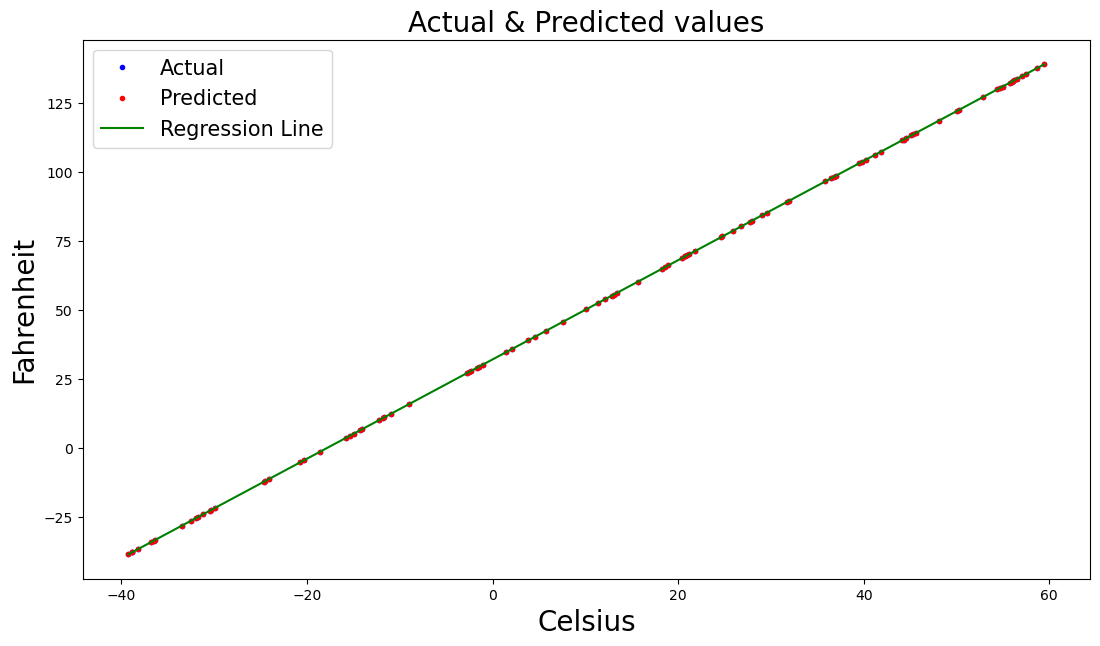

In [ ]:
plt.figure(figsize=(13, 7))
plt.xlabel('Celsius', fontsize=20)
plt.ylabel('Fahrenheit', fontsize=20)
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, y_pred, 'r.', label='Predicted')

sorted_idx = np.argsort(x_test['celsius'])
x_test_sorted = x_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.plot(x_test_sorted, y_pred_sorted, 'g-', label='Regression Line')

plt.title('Actual & Predicted values', fontsize=20)
plt.legend(fontsize=15)
plt.show()


Pridicting using Random Forest (regressor as RandomForest can be used for clasification problems as well)

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred2 = rf_regressor.predict(x_test)


performance evalution metrics Mean Absolute Percentage Error and Mean Squared Error

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred2)

mse = mean_squared_error(y_test, y_pred2)


print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Percentage Error: 0.009044868037113234
Mean Squared Error: 0.0819942448679971


plottting graph for Actual & Predicted values.(also showcasing the function)

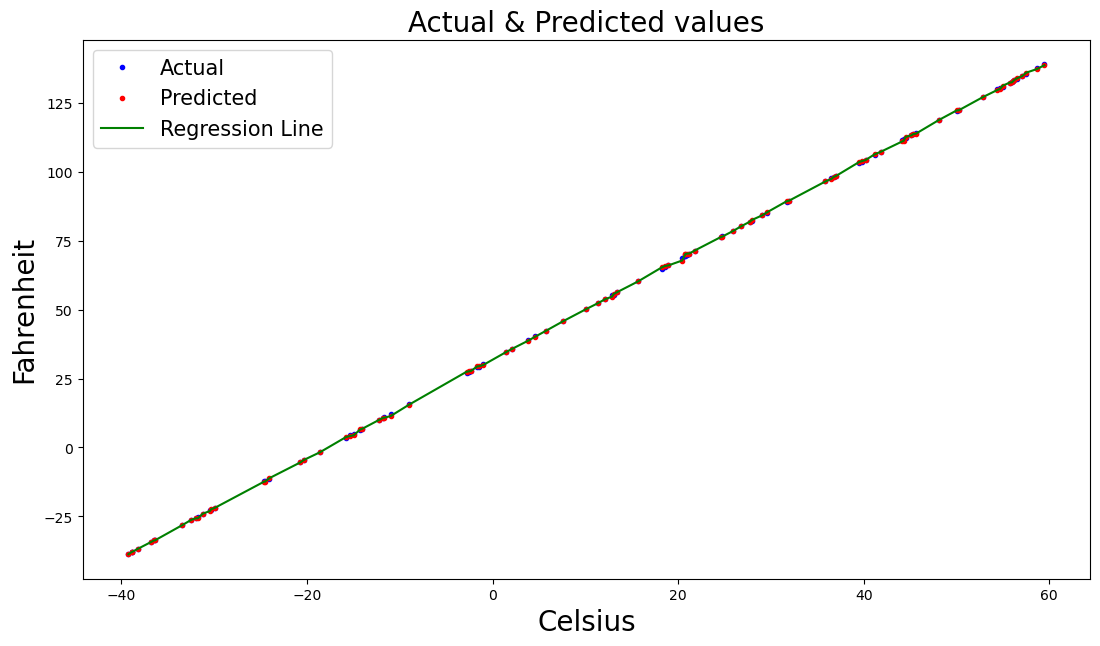

In [ ]:
plt.figure(figsize=(13, 7))
plt.xlabel('Celsius', fontsize=20)
plt.ylabel('Fahrenheit', fontsize=20)
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, y_pred2, 'r.', label='Predicted')

sorted_idx = np.argsort(x_test['celsius'])
x_test_sorted = x_test.iloc[sorted_idx]
y_pred2_sorted = y_pred2[sorted_idx]

plt.plot(x_test_sorted, y_pred2_sorted, 'g-', label='Regression Line')

plt.title('Actual & Predicted values', fontsize=20)
plt.legend(fontsize=15)
plt.show()